# IMPORT LIBRARIES 


In [42]:
#Examining and visualizing data.
#Discovering insights and patterns.
#Understanding the dataset's structure.
#Utilizing libraries like Pandas, NumPy, Matplotlib, and Seaborn for data manipulation, numerical operations, and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.stats import skew

In [43]:
# Import the dataset
#This line of code reads a dataset named 'Heart_Disease_Prediction.csv' and stores it in a DataFrame called 'df' for further data analysis and manipulation.
df = pd.read_csv('Heart_Disease_Prediction.xls')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [4]:
#The first value represents the number of rows in the DataFrame.
#The second value represents the number of columns in the DataFrame.
df.shape


(270, 14)

In [5]:
#Gives you a brief overview of the DataFrame
#The total number of non-null entries in each column.
#The data type of each column (e.g., integer, float, object).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [11]:
#Descriptive statistics(Descriptive statistics helps facilitate data visualization.)
#Gives a concise statistical summary for count, mean, standard deviation, minimum, quartiles, and maximum values.
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


# Data Filtering

In [12]:
#Counts missing values in each column.
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [40]:
#There is no null value present

C:\Users\nikhi\AppData\Local\Temp\ipykernel_24052\1301162315.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


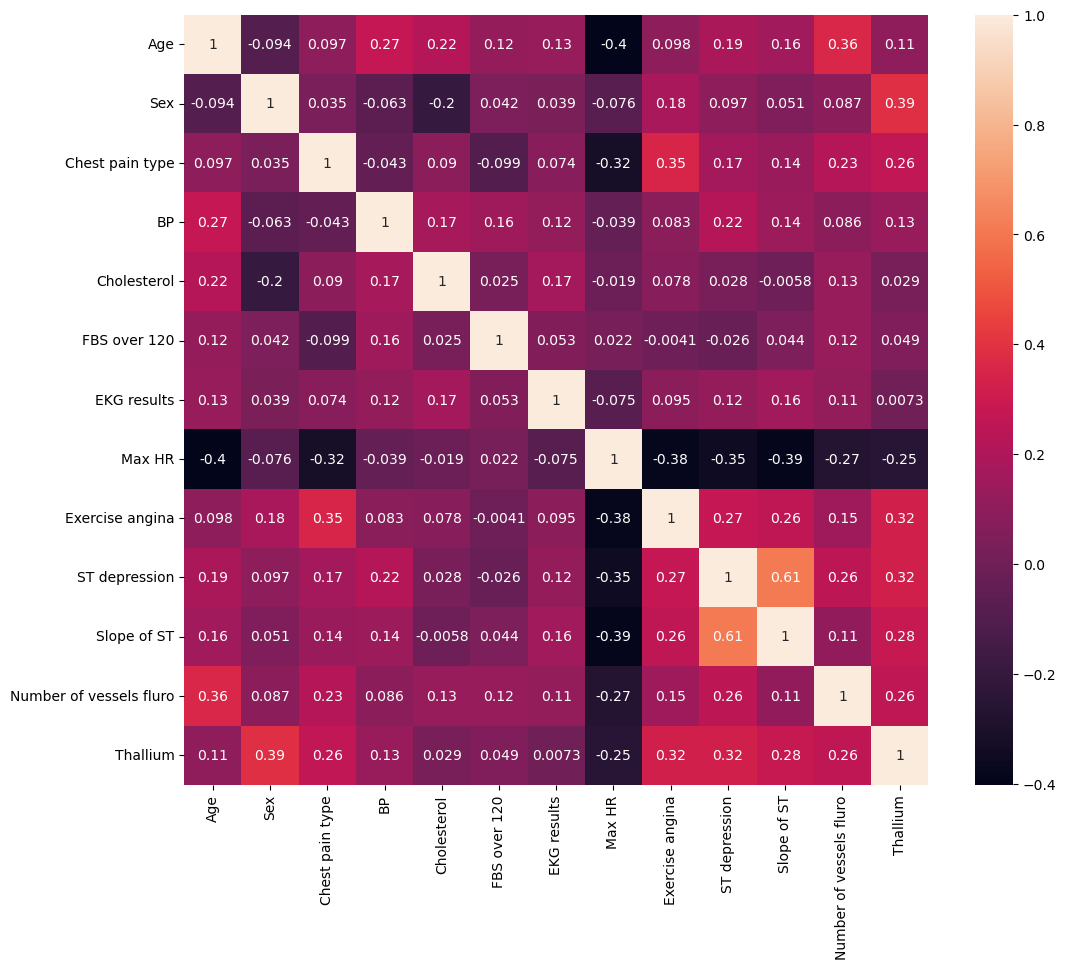

In [13]:
#Visualize the strength of correlation among variable
# Set the figure size first
plt.figure(figsize=(12, 10))  

# Create the heatmap
sns.heatmap(df.corr(), annot=True)

# Display the heatmap
plt.show()
#it is various shades of same colors for each value to be ploted , Dark colors indicate strong corr and light colors indicate weak corr


# Exploratory Data Analysis

In [14]:
#Skewness:
#Skewness is a valuable statistic for understanding the shape and asymmetry of data distributions.
#It can help you identify the presence of outliers or assess the appropriateness of certain statistical assumptions in your analysis
# A positive skewness value suggests a rightward skew (long tail to the right)
# A negative skewness value indicates a leftward skew (long tail to the left).
# A skewness value near zero implies a relatively symmetric distribution.

In [15]:
#To measure the level of asymmetry in our graph
print(skew(df['Age']))

-0.16270484746689945


In [16]:
#Age is slightly negatively skewed.


In [9]:
df['Age'].mean()

54.43333333333333

In [11]:
df['Age'].median()

55.0

In [17]:
import matplotlib.pyplot as plt

# Step 1: Identify and remove outliers
Q1 = df['Age'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['Age'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

In [18]:
cleaned_df['Age'].median()

55.0

In [19]:
cleaned_df['Age'].mean()

54.43333333333333

In [20]:
#As mean and median after cleaning had same values respectively.
#We can conclude that there are no outliers in Age coloumn.

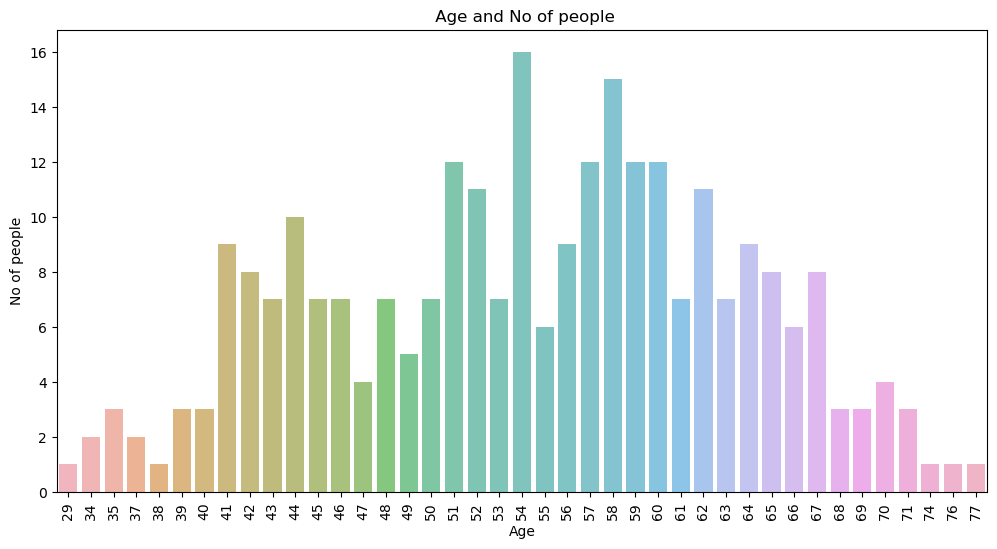

In [10]:
#The code creates a bar plot to visualize the distribution of ages in your dataset
Age_counts = df['Age'].value_counts()

# Increase the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot with rotated x-axis labels
sns.barplot(x=Age_counts.index, y=Age_counts.values, alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.title(' Age and No of people')
plt.xlabel('Age')
plt.ylabel('No of people')
plt.show()

In [22]:
print(skew(df['Sex']))
d2=df['Sex'].value_counts()

-0.7608272549847587


In [23]:
# skewness value of -0.7608 for a variable called "sex" suggests that the distribution of this variable is negatively skewed.

In [24]:
df['Sex'].mean()

0.6777777777777778

In [25]:
df['Sex'].median()

1.0

In [26]:
import matplotlib.pyplot as plt

# Step 1: Identify and remove outliers
Q1 = df['Sex'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['Sex'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['Sex'] >= lower_bound) & (df['Sex'] <= upper_bound)]

In [27]:
cleaned_df['Sex'].mean()

0.6777777777777778

In [28]:
cleaned_df['Sex'].median()

1.0

In [29]:
#As mean and median after cleaning had same values respectively.
#We can conclude that there are no outliers in Sex coloumn.

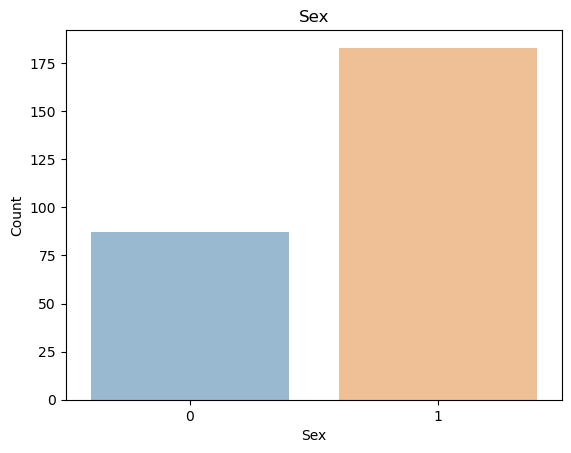

In [30]:
sex_counts = df['Sex'].value_counts()

sns.barplot(x=sex_counts.index, y=sex_counts.values, alpha=0.5)
plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [31]:
print(skew(df['Chest pain type']))
d3=df['Chest pain type'].value_counts()

-0.8738776430260496


In [32]:
#skewness value of -0.8739 for a variable named "Chest pain type" suggests that the distribution of this variable is negatively skewed.

In [33]:
cleaned_df['Chest pain type'].mean()

3.174074074074074

In [34]:
cleaned_df['Chest pain type'].median()

3.0

In [35]:
# Step 1: Identify and remove outliers
Q1 = df['Chest pain type'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['Chest pain type'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['Chest pain type'] >= lower_bound) & (df['Chest pain type'] <= upper_bound)]

In [36]:
cleaned_df['Chest pain type'].mean()

3.348

In [37]:
cleaned_df['Chest pain type'].median()

4.0

In [38]:
#As we can see changes in the mean and median values after cleaning
#Hence we can conclude that their were outliers present in Chest pain type coloumn 
#Outliers have also been removed

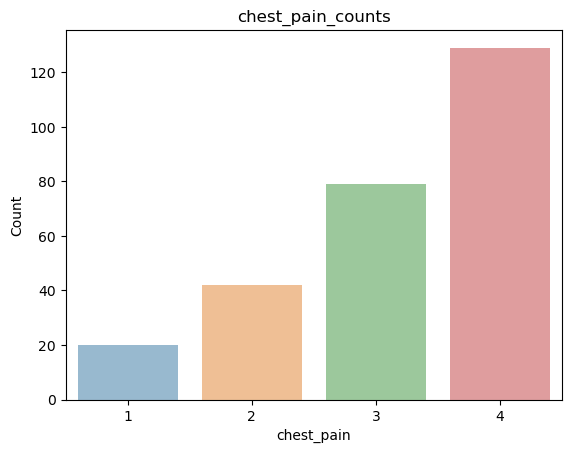

In [39]:
chest_pain_counts = df['Chest pain type'].value_counts()

sns.barplot(x=chest_pain_counts.index, y=chest_pain_counts, alpha=0.5)
plt.title('chest_pain_counts')
plt.xlabel('chest_pain')
plt.ylabel('Count')
plt.show()

In [40]:
print(skew(df['BP']))

0.7185972511657525


In [41]:
#A skewness value of 0.7186 for a variable named "BP" suggests that the distribution of this variable is positively skewed.

In [42]:
df['BP'].mean()

131.34444444444443

In [43]:
df['BP'].median()

130.0

In [44]:
# Step 1: Identify and remove outliers
Q1 = df['BP'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['BP'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['BP'] >= lower_bound) & (df['BP'] <= upper_bound)]

In [45]:
cleaned_df['BP'].mean()

129.61302681992336

In [46]:
cleaned_df['BP'].median()

130.0

In [47]:
#As we can see changes in the mean value but median value remains same
#Hence we can conclude that their were outliers present in BP coloumn 
#Outliers have also been removed

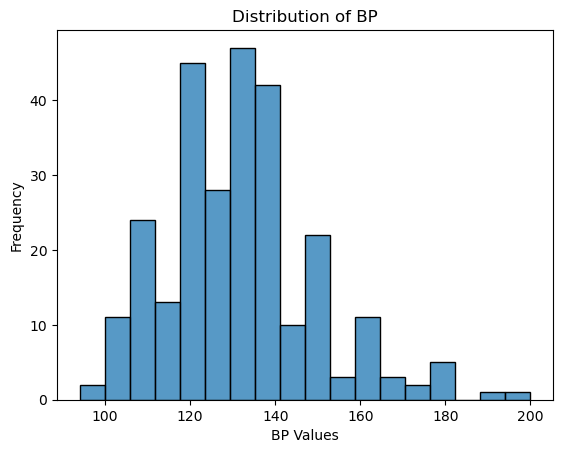

In [48]:
sns.histplot(data=df, x='BP')
plt.title('Distribution of BP')
plt.xlabel('BP Values')
plt.ylabel('Frequency')
plt.show()

In [49]:
print(skew(df['Cholesterol']))

1.1771344865188054


In [50]:
#A skewness value of 1.1771 for a variable named "Cholesterol" suggests that the distribution of this variable is positively skewed.

In [51]:
df['Cholesterol'].mean()

249.65925925925927

In [52]:
df['Cholesterol'].median()

245.0

In [53]:
Q1 = df['Cholesterol'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['Cholesterol'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['Cholesterol'] >= lower_bound) & (df['Cholesterol'] <= upper_bound)]

In [54]:
cleaned_df['Cholesterol'].mean()

246.10188679245283

In [55]:
cleaned_df['Cholesterol'].median()

244.0

In [56]:
#As we can see changes in the mean value but median value remains same
#Hence we can conclude that their were outliers present in Cholesterol coloumn 
#Outliers have also been removed

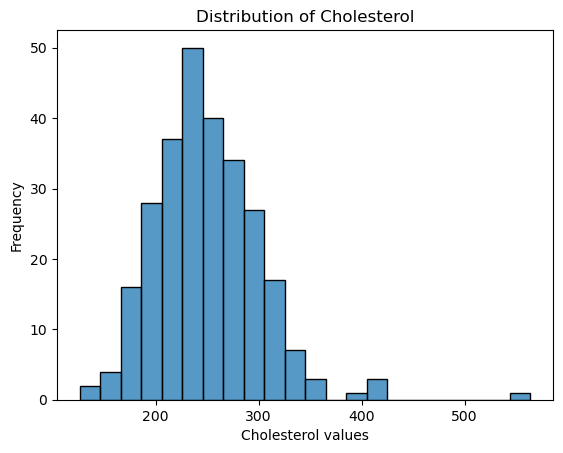

In [57]:
sns.histplot(data=df, x='Cholesterol')
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol values')
plt.ylabel('Frequency')
plt.show()

In [58]:
print(skew(df["FBS over 120"]))

1.9808869335422106


In [59]:
# skewness value of 1.9809 for a variable named "FBS over 120" suggests that the distribution of this variable is positively skewed.

In [60]:
df['FBS over 120'].mean()

0.14814814814814814

In [61]:
df['FBS over 120'].median()

0.0

In [62]:
Q1 = df['FBS over 120'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['FBS over 120'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['FBS over 120'] >= lower_bound) & (df['FBS over 120'] <= upper_bound)]

In [63]:
cleaned_df['FBS over 120'].mean()

0.0

In [64]:
cleaned_df['FBS over 120'].median()

0.0

In [65]:
#As we can see changes in the mean value but median value remains same
#Hence we can conclude that their were outliers present in FBS over 120 coloumn 
#Outliers have also been removed

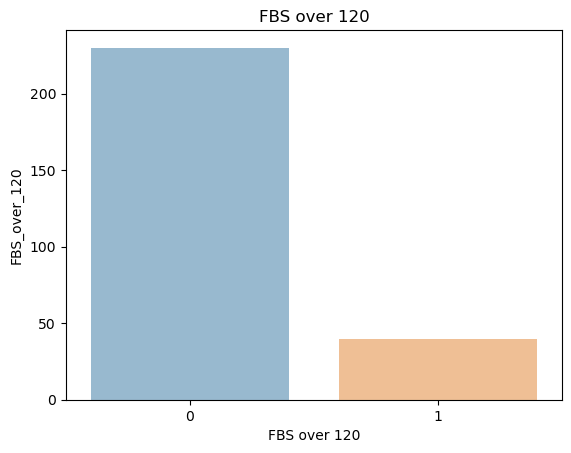

In [66]:
FBS_over_120 = df['FBS over 120'].value_counts()

sns.barplot(x=FBS_over_120.index, y=FBS_over_120, alpha=0.5)
plt.title('FBS over 120')
plt.xlabel('FBS over 120')
plt.ylabel('FBS_over_120')
plt.show()

In [67]:
print(skew(df["EKG results"]))

-0.04445449540212513


In [68]:
 #"EKG results" suggests that the distribution of this variable is very close to being symmetric or normally distributed.

In [69]:
df['EKG results'].mean()

1.0222222222222221

In [70]:
df['EKG results'].median()

2.0

In [71]:
Q1 = df['EKG results'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['EKG results'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['EKG results'] >= lower_bound) & (df['EKG results'] <= upper_bound)]

In [72]:
cleaned_df['EKG results'].mean()

1.0222222222222221

In [73]:
cleaned_df['EKG results'].median()

2.0

In [74]:
#As mean and median after cleaning had same values respectively.
#We can conclude that there are no outliers in EKG results coloumn.

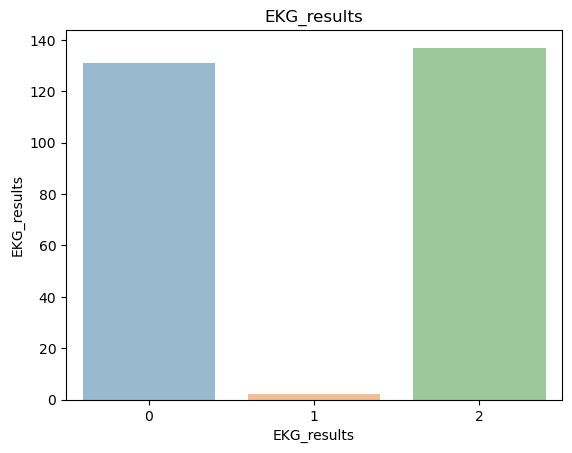

In [75]:
EKG_results = df['EKG results'].value_counts()

sns.barplot(x=EKG_results.index, y=EKG_results, alpha=0.5)

plt.title('EKG_results')
plt.xlabel('EKG_results')
plt.ylabel('EKG_results')
plt.show()

In [76]:
print(skew(df['Max HR']))

-0.5248002761623585


In [77]:
#skewness value of -0.5248 for a variable named "Max HR" suggests that the distribution of this variable is negatively skewed.


In [78]:
df['Max HR'].mean()

149.67777777777778

In [79]:
df['Max HR'].median()

153.5

In [80]:
Q1 = df['Max HR'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['Max HR'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['Max HR'] >= lower_bound) & (df['Max HR'] <= upper_bound)]

In [81]:
cleaned_df['Max HR'].mean()

149.9702602230483

In [82]:
cleaned_df['Max HR'].median()

154.0

In [83]:
#As we can see slight changes in the mean value and median value
#Hence we can conclude that their were outliers present in Max HRcoloumn 
#Outliers have also been removed

C:\Users\nikhi\AppData\Local\Temp\ipykernel_24052\1862987100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Max_HR=sns.distplot(df['Max HR'])


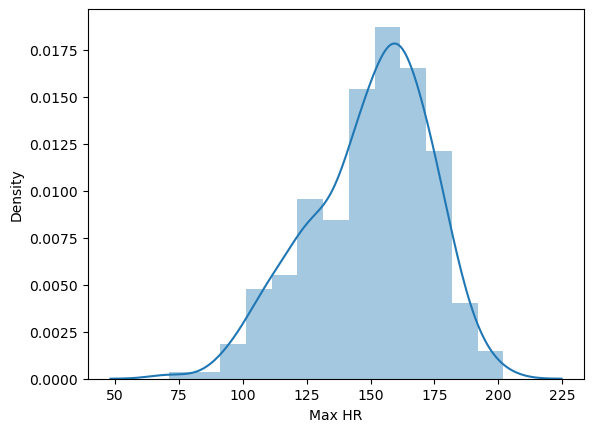

In [84]:
Max_HR=sns.distplot(df['Max HR'])

In [85]:
print(skew(df["Exercise angina"]))

0.7248590017036832


In [86]:
#skewness value of 0.7249 for a variable named "Exercise angina" suggests that the distribution of this variable is positively skewed.

In [87]:
df['Exercise angina'].mean()

0.3296296296296296

In [88]:
df['Exercise angina'].median()

0.0

In [89]:
Q1 = df['Exercise angina'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['Exercise angina'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['Exercise angina'] >= lower_bound) & (df['Exercise angina'] <= upper_bound)]

In [90]:
cleaned_df['Exercise angina'].mean()

0.3296296296296296

In [91]:
cleaned_df['Exercise angina'].median()

0.0

In [92]:
#As mean and median after cleaning had same values respectively.
#We can conclude that there are no outliers in Exercise angina coloumn.


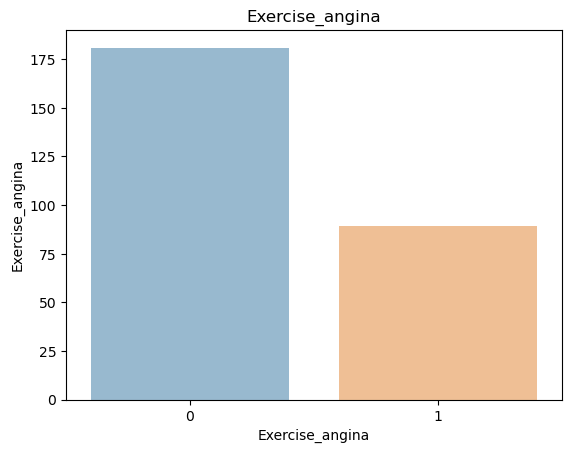

In [93]:
Exercise_angina = df['Exercise angina'].value_counts()

sns.barplot(x=Exercise_angina.index, y=Exercise_angina, alpha=0.5)
plt.title('Exercise_angina')
plt.xlabel('Exercise_angina')
plt.ylabel('Exercise_angina')
plt.show()

In [94]:
print(skew(df["ST depression"]))

1.2558662822202507


In [95]:
#skewness value of 1.255 for a variable named "ST depression" suggests that the distribution of this variable is positively skewed

In [96]:
df['ST depression'].mean()

1.05

In [97]:
df['ST depression'].median()

0.8

In [98]:
# Step 1: Identify and remove outliers
Q1 = df['ST depression'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['ST depression'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['ST depression'] >= lower_bound) & (df['ST depression'] <= upper_bound)]

In [99]:
cleaned_df['ST depression'].mean()

0.9898496240601502

In [100]:
cleaned_df['ST depression'].median()

0.8

In [101]:
#As we can see changes in the mean value but median value remains same
#Hence we can conclude that their were outliers present in ST depression coloumn 
#Outliers have also been removed

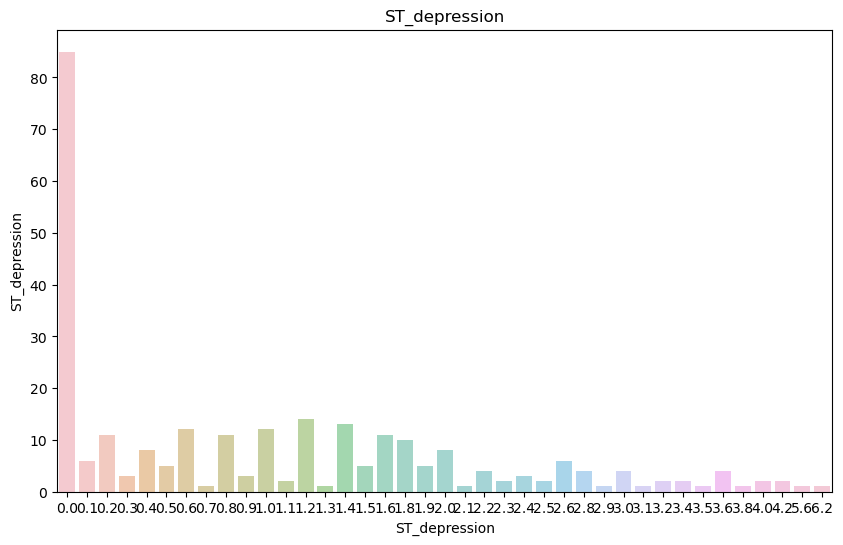

In [102]:
plt.figure(figsize=(10, 6))
ST_depression = df['ST depression'].value_counts()

sns.barplot(x=ST_depression.index, y=ST_depression, alpha=0.5)
plt.title('ST_depression')
plt.xlabel('ST_depression')
plt.ylabel('ST_depression')
plt.show()

In [103]:
print(skew(df["Slope of ST"]))

0.5401287878868305


In [104]:
#skewness value of 0.540 for a variable named "Slope of ST" suggests that the distribution of this variable is positively skewed

In [105]:
df['Slope of ST'].mean()

1.5851851851851853

In [106]:
df['Slope of ST'].median()

2.0

In [107]:

# Step 1: Identify and remove outliers
Q1 = df['Slope of ST'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['Slope of ST'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['Slope of ST'] >= lower_bound) & (df['Slope of ST'] <= upper_bound)]

In [108]:
cleaned_df['Slope of ST'].mean()

1.5851851851851853

In [109]:
cleaned_df['Slope of ST'].median()

2.0

In [110]:
#As mean and median after cleaning had same values respectively.
#We can conclude that there are no outliers in Slope of ST coloumn.

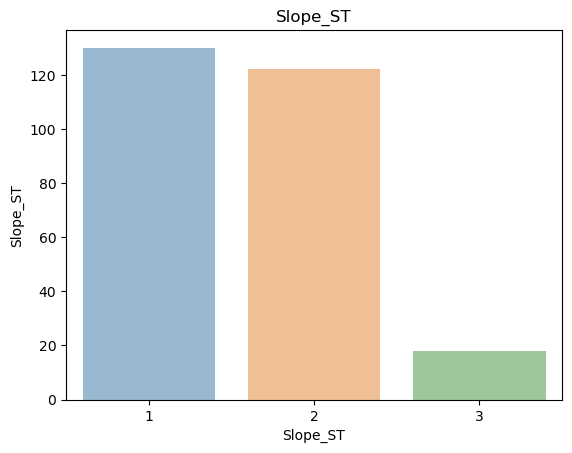

In [111]:
Slope_ST = df['Slope of ST'].value_counts()

sns.barplot(x=Slope_ST.index, y=Slope_ST, alpha=0.5)
plt.title('Slope_ST')
plt.xlabel('Slope_ST')
plt.ylabel('Slope_ST')
plt.show()

In [112]:
print(skew(df["Number of vessels fluro"]))

1.203158419280704


In [113]:
#skewness value of 1.203 for a variable named "Number of vessels fluro" suggests that the distribution of this variable is positively skewed

In [114]:
df['Number of vessels fluro'].mean()

0.6703703703703704

In [115]:
df['Number of vessels fluro'].median()

0.0

In [116]:
# Step 1: Identify and remove outliers
Q1 = df['Number of vessels fluro'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['Number of vessels fluro'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['Number of vessels fluro'] >= lower_bound) & (df['Number of vessels fluro'] <= upper_bound)]

In [117]:
cleaned_df['Number of vessels fluro'].mean()

0.4940239043824701

In [118]:
cleaned_df['Number of vessels fluro'].median()

0.0

In [119]:
#As we can see changes in the mean value but median value remains same
#Hence we can conclude that their were outliers present in Number of vessels flurocoloumn 
#Outliers have also been removed

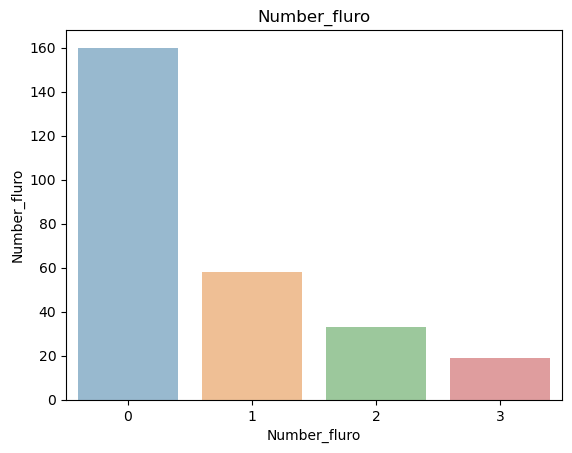

In [120]:
Number_fluro = df['Number of vessels fluro'].value_counts()

sns.barplot(x=Number_fluro.index, y=Number_fluro, alpha=0.5)
plt.title('Number_fluro')
plt.xlabel('Number_fluro')
plt.ylabel('Number_fluro')
plt.show()

In [121]:
print(skew(df["Thallium"]))

0.28566960045946643


In [122]:
#skewness value of 0.285 for a variable named "Thallium" suggests that the distribution of this variable is positively skewed

In [123]:
df['Thallium'].mean()

4.696296296296296

In [124]:
df['Thallium'].median()

3.0

In [125]:
# Step 1: Identify and remove outliers
Q1 = df['Thallium'].quantile(0.25)  # Use 0.25 to get the first quartile (Q1)
Q3 = df['Thallium'].quantile(0.75)  # Use 0.75 to get the third quartile (Q3)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['Thallium'] >= lower_bound) & (df['Thallium'] <= upper_bound)]

In [126]:
cleaned_df['Thallium'].mean()

4.696296296296296

In [127]:
cleaned_df['Thallium'].median()

3.0

In [128]:
#As mean and median after cleaning had same values respectively.
#We can conclude that there are no outliers in Thallium coloumn.

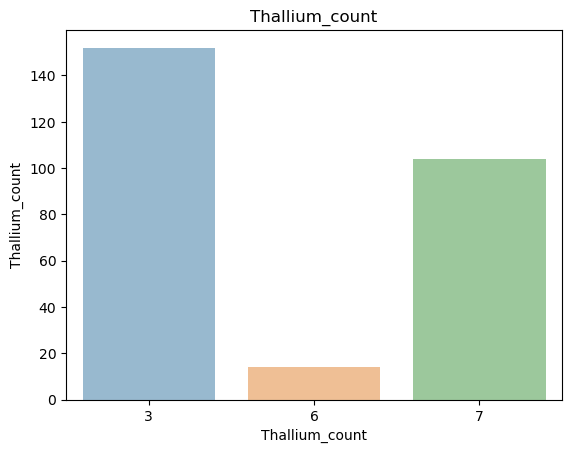

In [129]:
Thallium_count = df['Thallium'].value_counts()

sns.barplot(x=Thallium_count.index, y=Thallium_count, alpha=0.5)
plt.title('Thallium_count')
plt.xlabel('Thallium_count')
plt.ylabel('Thallium_count')
plt.show()

# Relation of each column with heart disease

In [130]:
#The independent variables are often referred to as "features," and the dependent variable is typically the "target" or "label.

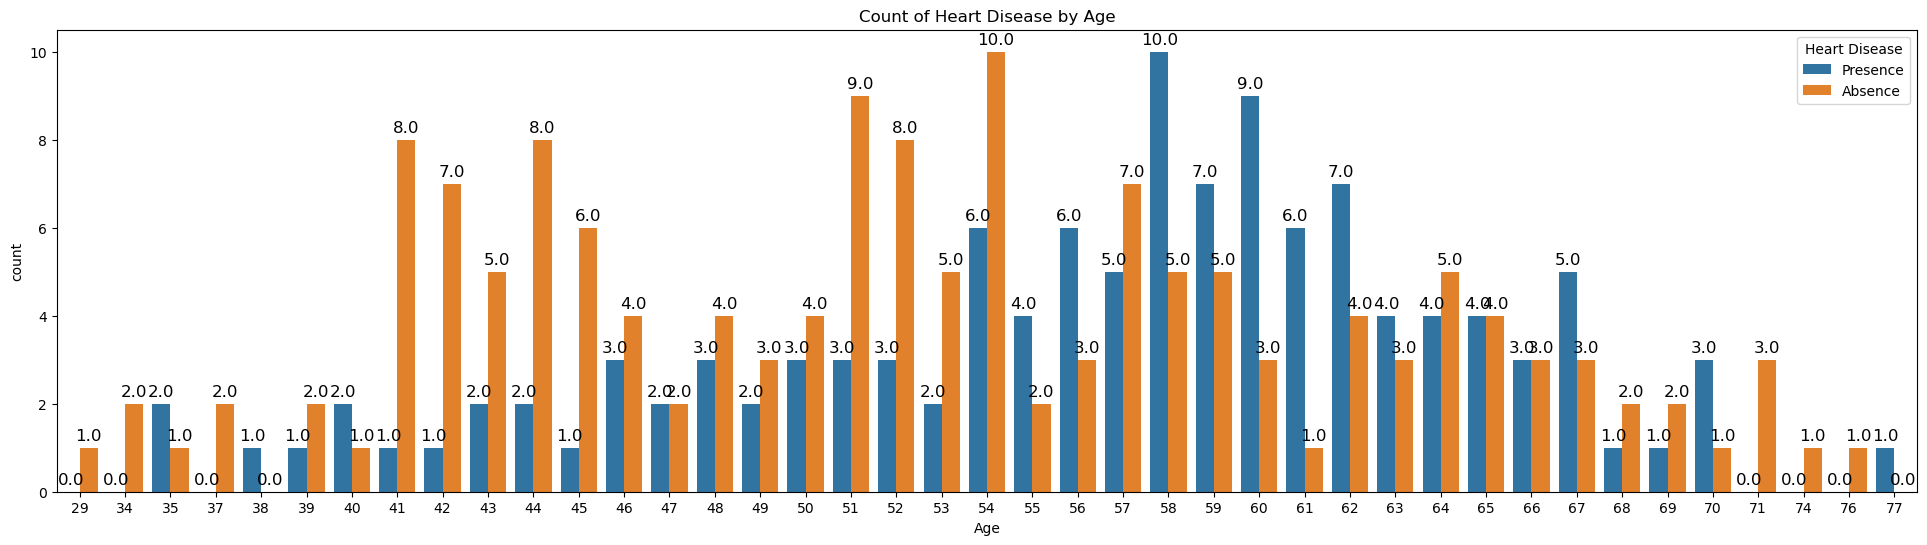

In [17]:
plt.figure(figsize=(24, 6))
ax = sns.countplot(data=df, x="Age", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]
ax.set_title("Count of Heart Disease by Age")
plt.show()

In [18]:
#By observing the above bar chat we understood that people around and above the age of 58 have higher risk of heart diseases compared to the people below the age of 58

In [21]:
#In the  bar chat below we have considered '0' as Male and '1' as Female

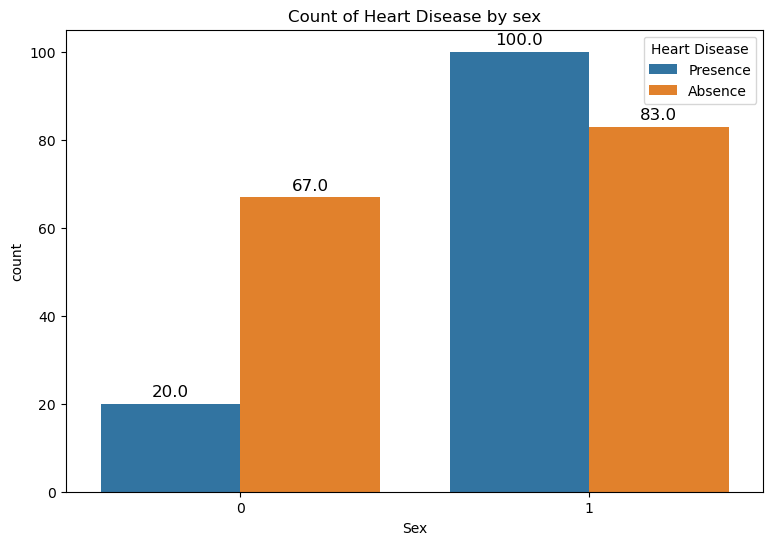

In [20]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(data=df, x="Sex", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]
ax.set_title("Count of Heart Disease by sex")
plt.show()

In [22]:
#In the above bar chat we understood that heart disease count was higher in females as compared to males

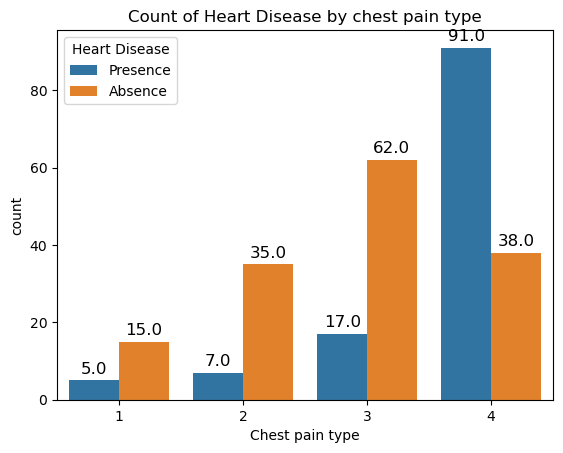

In [23]:
ax = sns.countplot(data=df, x="Chest pain type", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]
ax.set_title("Count of Heart Disease by chest pain type")
plt.show()

In [24]:
#In the above bar chart we observed that for heart disease type 1,2,3 the occurrence of chest pain is less than 4.

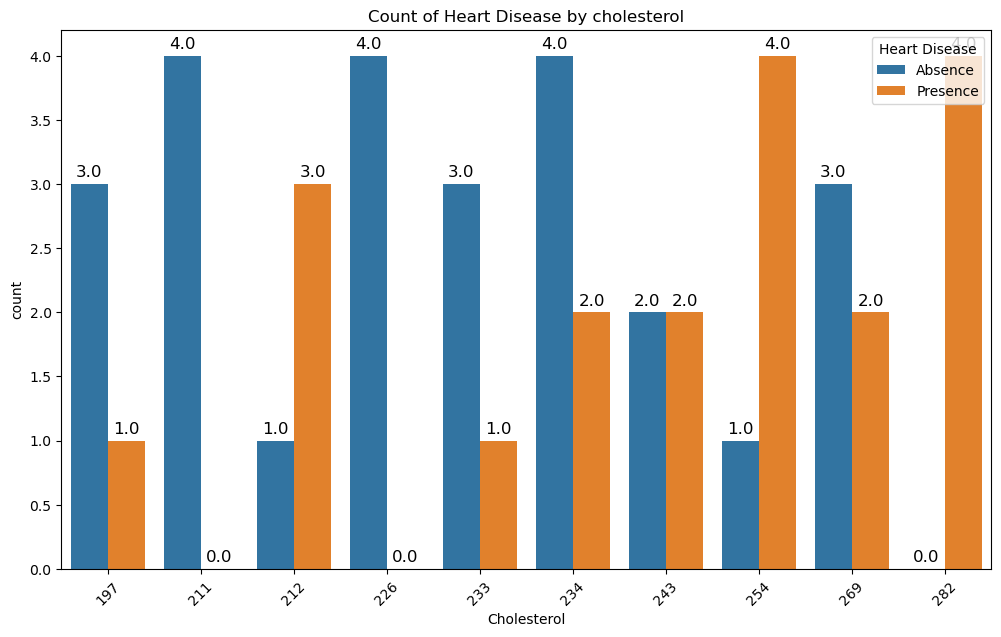

In [27]:
plt.figure(figsize=(12, 7))

# Filter the DataFrame to include only the top N most frequent 'BP' values for better readability
top_n = 10  # Change this value to control the number of displayed categories
top_bp_values = df['Cholesterol'].value_counts().index[:top_n]
filtered_df = df[df['Cholesterol'].isin(top_bp_values)]

ax = sns.countplot(data=filtered_df, x="Cholesterol", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]
ax.set_title("Count of Heart Disease by cholesterol")

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()


In [25]:
#In the following chart we have observed that most of the people have cholesterol,level as normal cholesterol suppose to be less than 200

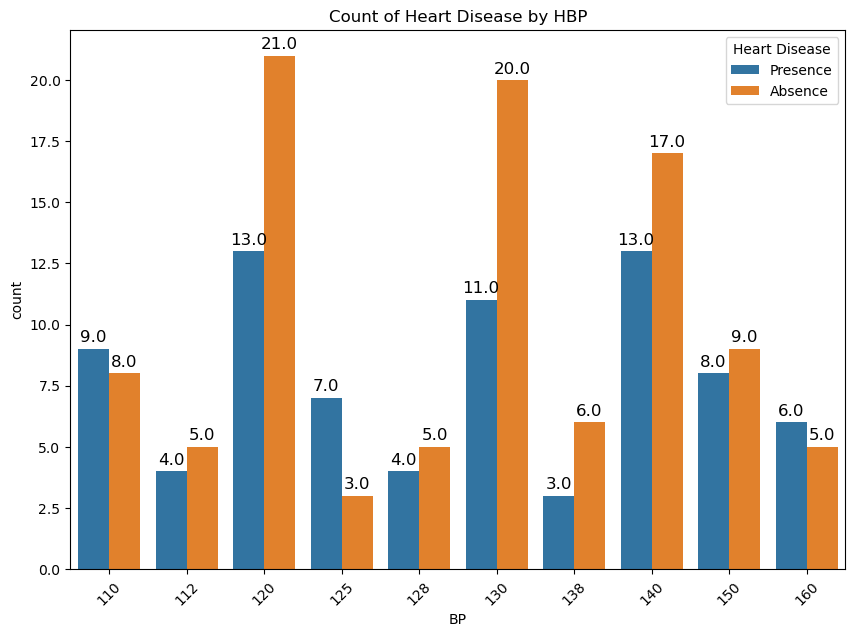

In [39]:
plt.figure(figsize=(10, 7))

# Filter the DataFrame to include only the top N most frequent 'BP' values for better readability
top_n = 10  # Change this value to control the number of displayed categories
top_bp_values = df['BP'].value_counts().index[:top_n]
filtered_df = df[df['BP'].isin(top_bp_values)]

ax = sns.countplot(data=filtered_df, x="BP", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]
ax.set_title("Count of Heart Disease by HBP")

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()

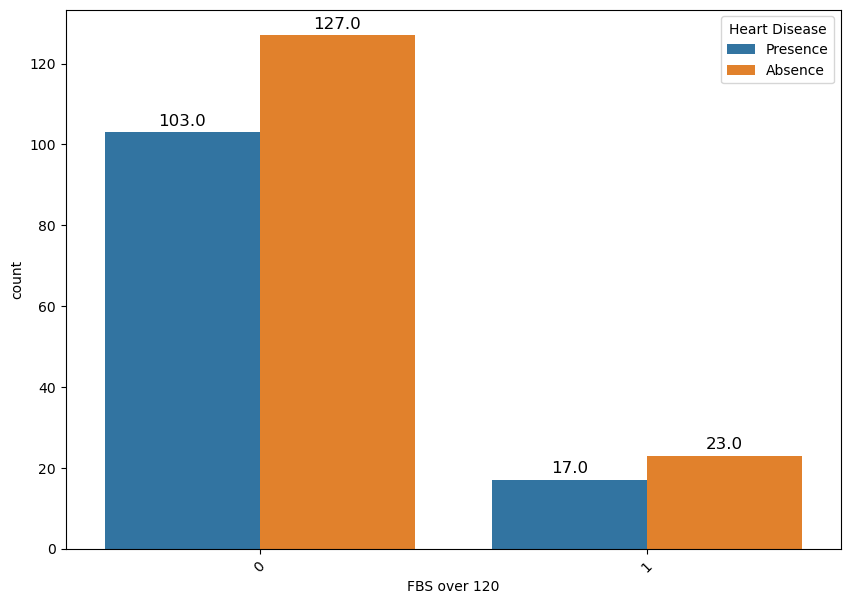

In [36]:
plt.figure(figsize=(10, 7))

# Filter the DataFrame to include only the top N most frequent 'BP' values for better readability
top_n = 10  # Change this value to control the number of displayed categories
top_bp_values = df['FBS over 120'].value_counts().index[:top_n]
filtered_df = df[df['FBS over 120'].isin(top_bp_values)]

ax = sns.countplot(data=filtered_df, x="FBS over 120", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()

In [38]:
#From the above chart we understood that absence level of heart disease in Fasting blood sugar is high than presence

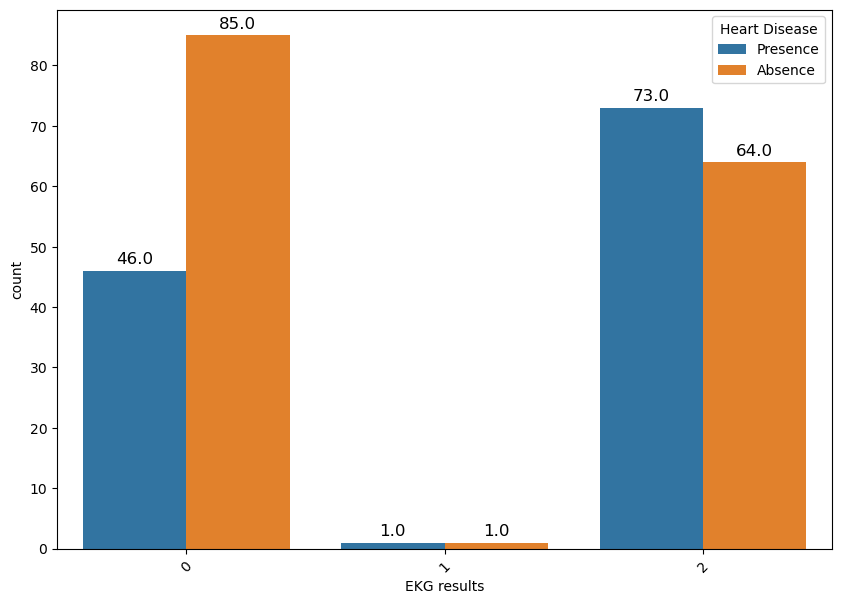

In [137]:
plt.figure(figsize=(10, 7))

# Filter the DataFrame to include only the top N most frequent 'BP' values for better readability
top_n = 10  # Change this value to control the number of displayed categories
top_bp_values = df['EKG results'].value_counts().index[:top_n]
filtered_df = df[df['EKG results'].isin(top_bp_values)]

ax = sns.countplot(data=filtered_df, x="EKG results", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()

In [ ]:
#Electrocardiogram - type 2 of EKG is observed to be present more in people having herat disease compared to type 1 and type 2

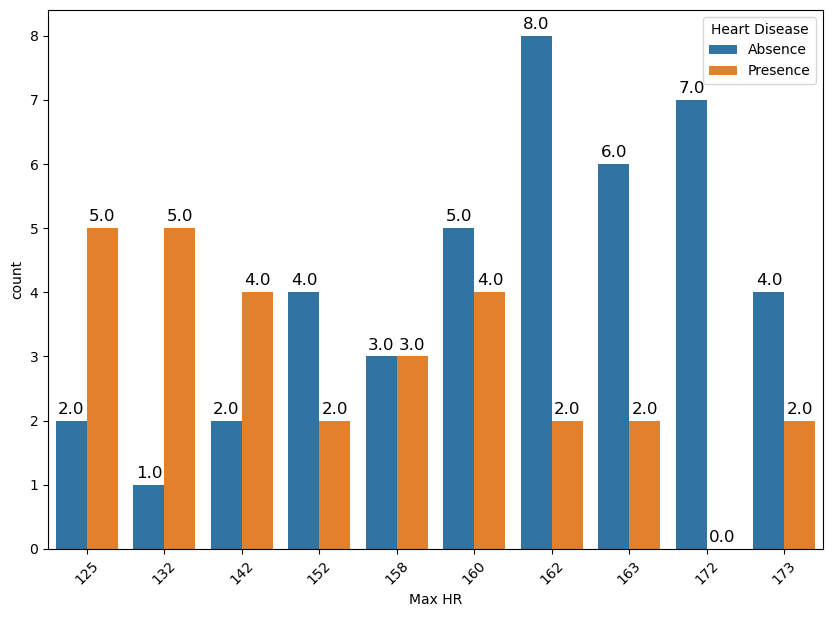

In [138]:
plt.figure(figsize=(10, 7))

# Filter the DataFrame to include only the top N most frequent 'BP' values for better readability
top_n = 10  # Change this value to control the number of displayed categories
top_bp_values = df['Max HR'].value_counts().index[:top_n]
filtered_df = df[df['Max HR'].isin(top_bp_values)]

ax = sns.countplot(data=filtered_df, x="Max HR", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()

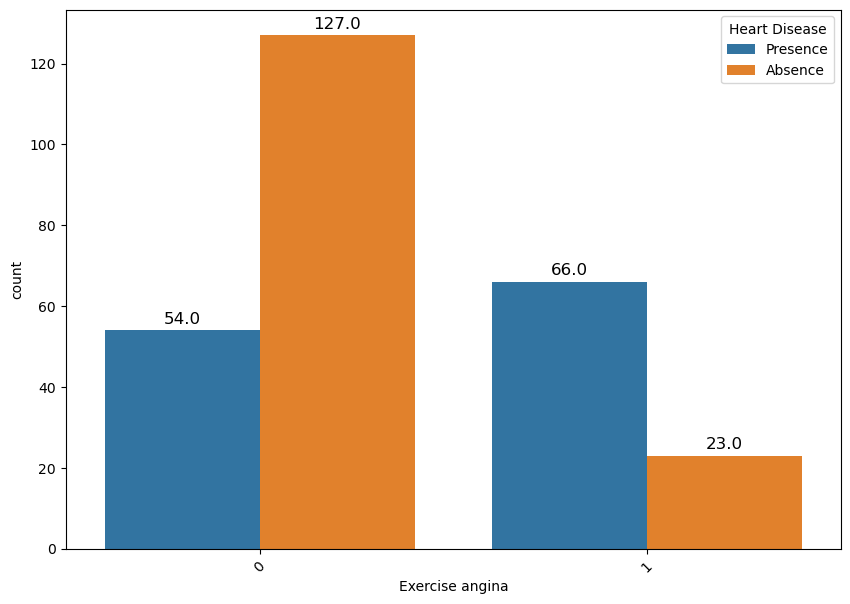

In [139]:
plt.figure(figsize=(10, 7))

# Filter the DataFrame to include only the top N most frequent 'BP' values for better readability
top_n = 10  # Change this value to control the number of displayed categories
top_bp_values = df['Exercise angina'].value_counts().index[:top_n]
filtered_df = df[df['Exercise angina'].isin(top_bp_values)]

ax = sns.countplot(data=filtered_df, x="Exercise angina", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()

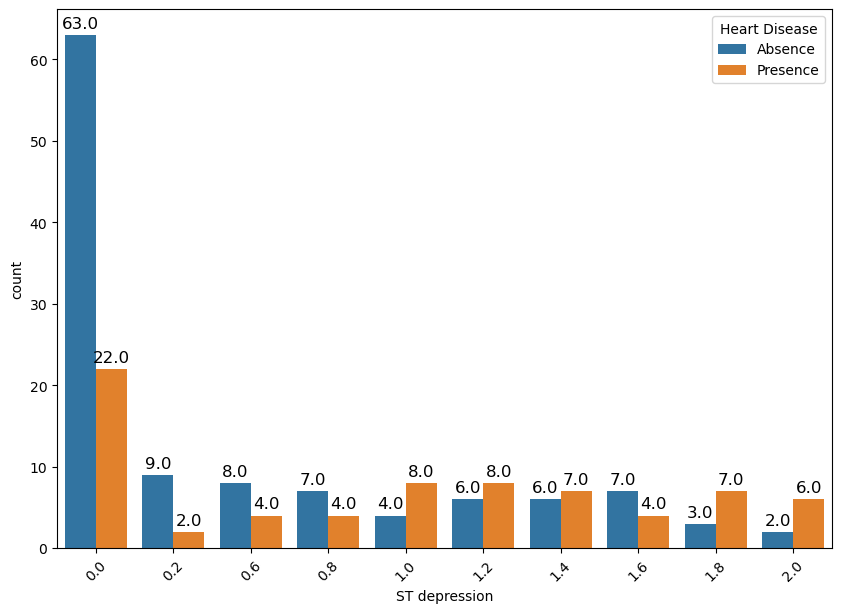

In [140]:
plt.figure(figsize=(10, 7))

# Filter the DataFrame to include only the top N most frequent 'BP' values for better readability
top_n = 10  # Change this value to control the number of displayed categories
top_bp_values = df['ST depression'].value_counts().index[:top_n]
filtered_df = df[df['ST depression'].isin(top_bp_values)]

ax = sns.countplot(data=filtered_df, x="ST depression", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()

In [ ]:
#st depression - type 0 of St depression is observed to be present more in people having herat disease compared to type 1 and type 3

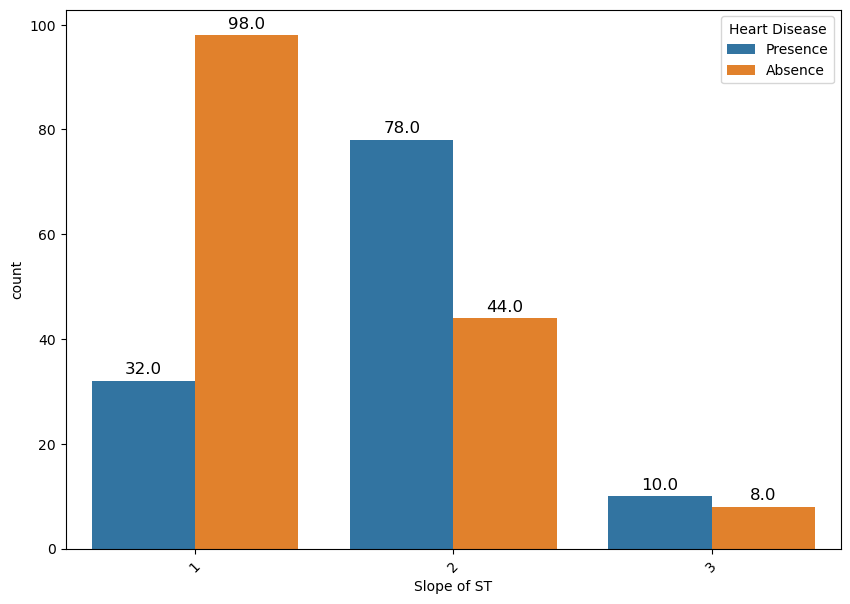

In [141]:
plt.figure(figsize=(10, 7))

# Filter the DataFrame to include only the top N most frequent 'BP' values for better readability
top_n = 10  # Change this value to control the number of displayed categories
top_bp_values = df['Slope of ST'].value_counts().index[:top_n]
filtered_df = df[df['Slope of ST'].isin(top_bp_values)]

ax = sns.countplot(data=filtered_df, x="Slope of ST", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()

In [148]:
#Slope of st - type 2 of Slope of st is observed to be present more in people having herat disease compared to type 1 and type 3

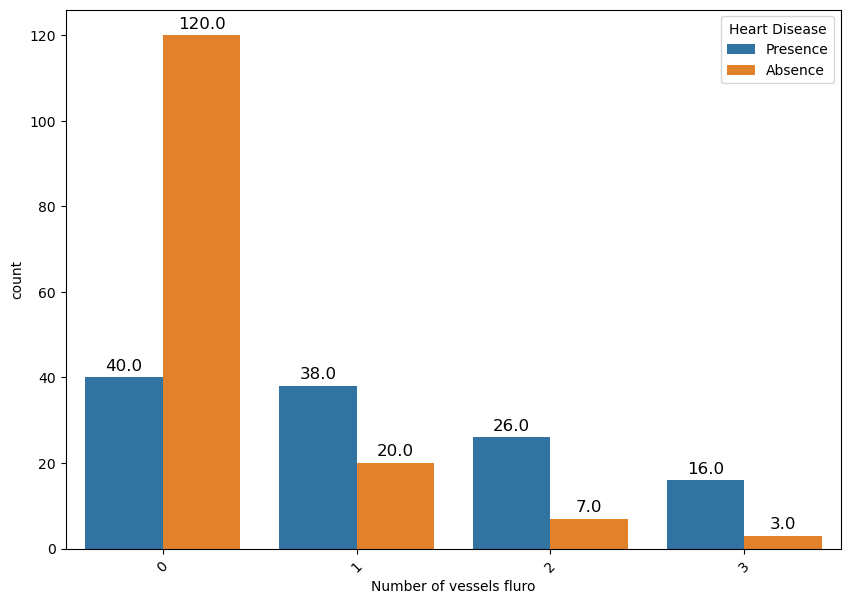

In [142]:
plt.figure(figsize=(10, 7))

# Filter the DataFrame to include only the top N most frequent 'BP' values for better readability
top_n = 10  # Change this value to control the number of displayed categories
top_bp_values = df['Number of vessels fluro'].value_counts().index[:top_n]
filtered_df = df[df['Number of vessels fluro'].isin(top_bp_values)]

ax = sns.countplot(data=filtered_df, x="Number of vessels fluro", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()

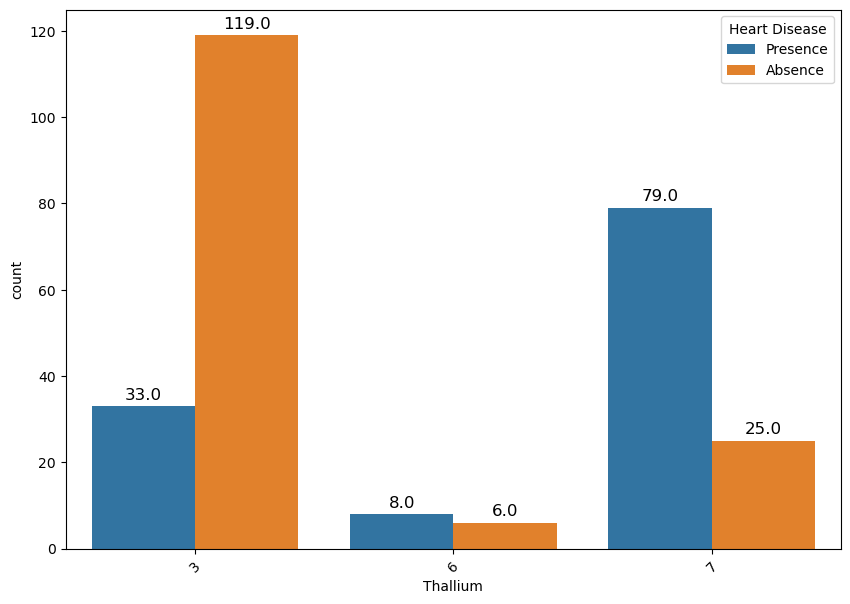

In [143]:
plt.figure(figsize=(10, 7))

# Filter the DataFrame to include only the top N most frequent 'BP' values for better readability
top_n = 10  # Change this value to control the number of displayed categories
top_bp_values = df['Thallium'].value_counts().index[:top_n]
filtered_df = df[df['Thallium'].isin(top_bp_values)]

ax = sns.countplot(data=filtered_df, x="Thallium", hue="Heart Disease")
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points') for p in ax.patches]

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.show()

In [ ]:
#Thallium - type 7 of Thallium is observed to be present more in people having herat disease compared to type 6 and type 3

In [145]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [48]:
final_data = pd.get_dummies(df,drop_first=True)
#performs one-hot encoding on the DataFrame 'df' by creating binary (0 or 1) columns for categorical variables.

In [49]:
#The code is splitting a DataFrame 'df' into two separate DataFrames, 'X' and 'Y,' using DataFrame indexing
#This code separates the features (in 'X') and the target variable (in 'Y') from the original DataFrame,
# 'X' contains the input data, and 'Y' contains the output or target data
Y=df.iloc[:,-1]
X=df.iloc[:,:-1]


In [50]:
#standard scaler
#Standardization scales the features to have a mean of 0 and a standard deviation of 1, making them suitable for use in machine learning models. The standardized features are stored in 'X_new' for further analysis
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_new= st.fit_transform(X)

In [51]:
#split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.3)

#  LogisticRegression

In [52]:
#line imports the logistic regression algorithm from scikit-learn.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [53]:
#'X_test' to evaluate how well it generalizes to new, unseen data   
X_test

array([[-1.47745975,  0.6894997 , -1.23804513, ..., -0.95423434,
        -0.71153494, -0.87570581],
       [ 0.83221678, -1.45032695,  0.87092765, ...,  2.3070729 ,
         2.47268219,  1.18927733],
       [ 0.1723092 ,  0.6894997 , -1.23804513, ..., -0.95423434,
        -0.71153494, -0.87570581],
       ...,
       [-1.14750596,  0.6894997 , -1.23804513, ..., -0.95423434,
        -0.71153494,  1.18927733],
       [-1.03752137, -1.45032695, -1.23804513, ...,  0.67641928,
        -0.71153494, -0.87570581],
       [ 0.2822938 ,  0.6894997 , -0.18355874, ..., -0.95423434,
        -0.71153494, -0.87570581]])

In [54]:
#This line uses the trained logistic regression model 'lr' to make predictions based on the input testing feature data 'X_test
y_pred = lr.predict(X_test)
y_pred

array(['Absence', 'Presence', 'Absence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence

In [55]:
#confusion matrix and classification
from sklearn.metrics import confusion_matrix
#confusion_matrix function from scikit-learn, which is a tool for assessing the performance of a classification model
confusion_matrix(Y_test,y_pred)
#The confusion matrix helps you understand how well your model performs in terms of accuracy, precision, recall, and other classification metrics

array([[48,  3],
       [ 8, 22]], dtype=int64)

In [56]:
#classification_report function provides a comprehensive summary of key classification metrics, helping you assess how well your model performs for different classes in your classification task
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

     Absence       0.86      0.94      0.90        51
    Presence       0.88      0.73      0.80        30

    accuracy                           0.86        81
   macro avg       0.87      0.84      0.85        81
weighted avg       0.87      0.86      0.86        81



In [57]:
#Returns the accuracy of the logistic regression model on the training data, giving you an idea of how well the model fits the training data
lr.score(X_train,Y_train)

0.8677248677248677

In [58]:
#Returns the accuracy of the logistic regression model on the testing data, giving you an idea of how well the model generalizes to new, unseen data
lr.score(X_test,Y_test)

0.8641975308641975

In [59]:
#The fact that the training accuracy is much higher than the test accuracy suggests overfitting.(use classification)
#The accuracy on the training data is relatively high, indicating that the model performs well on the data it was trained on. 

# KNN

In [60]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_new = sc.fit_transform(X)

In [61]:
#test train split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.3,random_state=50)

In [62]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(189, 13)
(189,)
(81, 13)
(81,)


In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17,weights='uniform',algorithm='auto',metric='minkowski')
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=17)

In [64]:
Y_predict = knn.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_predict))

[[47  3]
 [11 20]]


In [66]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

     Absence       0.81      0.94      0.87        50
    Presence       0.87      0.65      0.74        31

    accuracy                           0.83        81
   macro avg       0.84      0.79      0.81        81
weighted avg       0.83      0.83      0.82        81



In [67]:
#cross validation
from sklearn.model_selection import cross_val_score
(cross_val_score(knn,X_test,Y_test,cv=5)).mean()

0.8161764705882353

In [68]:
(cross_val_score(knn,X_train,Y_train,cv=5)).mean()

0.8411095305832148

In [69]:
#The fact that the training accuracy is much higher than the test accuracy suggests overfitting.(use classification)

# SVM algorithm(only apply check accuracy)

In [70]:
from sklearn.svm import SVC
sc = SVC()


In [71]:
svc = SVC(kernel='linear') 

In [72]:
svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [73]:
Y_predict = svc.predict(X_test)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

     Absence       0.85      0.92      0.88        50
    Presence       0.85      0.74      0.79        31

    accuracy                           0.85        81
   macro avg       0.85      0.83      0.84        81
weighted avg       0.85      0.85      0.85        81



In [75]:
svc.score(X_train,Y_train)

0.8783068783068783

In [76]:
svc.score(X_test,Y_test)

0.8518518518518519

In [77]:
#The fact that the training accuracy is much higher than the test accuracy suggests overfitting.

# Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=14,ccp_alpha=0.0)

In [90]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=14)

In [91]:
Y_predict= dt.predict(X_test)

In [92]:
#confusion matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

     Absence       0.77      0.82      0.80        50
    Presence       0.68      0.61      0.64        31

    accuracy                           0.74        81
   macro avg       0.73      0.72      0.72        81
weighted avg       0.74      0.74      0.74        81



In [93]:
dt.score(X_train,Y_train)

1.0

dt.score(X_test,Y_test)

In [184]:
#The fact that the training accuracy is much higher than the test accuracy suggests overfitting.

# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [125]:
#define the classifier
random_classifier = RandomForestClassifier(n_estimators=250)

In [127]:
random_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=250)

In [128]:
Y_predict=random_classifier.predict(X_test)

In [129]:
random_classifier.score(X_train,Y_train)

1.0

In [130]:
random_classifier.score(X_test,Y_test)

0.8271604938271605

# As compared and analyzed with other training and testing data we could conclude that the SVM algorithm had the closed accuracy with test results as 0.85 and training result came out to be 0.87